In [16]:
from langgraph.graph import START, END, StateGraph
from langchain_groq import ChatGroq
from typing import TypedDict
from IPython.display import Image, Markdown
from dotenv import load_dotenv

_ = load_dotenv()

In [2]:
llm = ChatGroq(model="openai/gpt-oss-20b")

In [3]:
class PromptChainState(TypedDict):
    topic: str
    outline: str
    content: str

In [11]:
def create_outline(state: PromptChainState) -> PromptChainState:
    prompt = f"Write 5 short outline for the following topic: {state['topic']}"
    state["outline"] = llm.invoke(prompt).content
    return state

def create_content(state: PromptChainState) -> PromptChainState:
    prompt = f"Write a short simple explanation content for the following outline: {state['outline']}"
    state["content"] = llm.invoke(prompt).content
    return state

In [12]:
# state graph
graph = StateGraph(PromptChainState)

#  add nodes
graph.add_node("create_outline", create_outline)
graph.add_node("create_content", create_content)

# add edges
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_content")
graph.add_edge("create_content", END)

# compile graph
workflow = graph.compile()

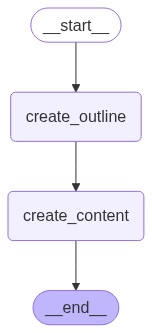

In [13]:
Image(workflow.get_graph().draw_mermaid_png())

In [14]:
initial_state = {"topic": "Machine Learning"}
final_state = workflow.invoke(initial_state)

In [17]:
initial_state = {"topic": "Machine Learning"}
final_state = workflow.invoke(initial_state)

# Build a Markdown-formatted string
output_text = f"""
**Topic:** {final_state['topic']}  

**Outline:**  
{final_state['outline']}  

**Content:**  
{final_state['content']}
"""

# Render as formatted Markdown
display(Markdown(output_text))



**Topic:** Machine Learning  

**Outline:**  
**Outline 1 – Foundations of Machine Learning**  
1. What is Machine Learning?  
2. Key concepts: data, model, loss, optimization  
3. Supervised vs. unsupervised vs. reinforcement  
4. Evaluation metrics (accuracy, precision, recall, ROC, etc.)  
5. Common pitfalls & ethical considerations  

---

**Outline 2 – The ML Development Pipeline**  
1. Problem definition & goal setting  
2. Data acquisition & preprocessing  
3. Feature engineering & selection  
4. Model training & hyper‑parameter tuning  
5. Validation, testing, and deployment  

---

**Outline 3 – Core Supervised Learning Algorithms**  
1. Linear models (regression, logistic regression)  
2. Tree‑based methods (decision trees, random forests, XGBoost)  
3. Support Vector Machines  
4. Neural networks & deep learning basics  
5. Model ensembles & stacking  

---

**Outline 4 – Unsupervised Learning & Representation Learning**  
1. Clustering (k‑means, hierarchical, DBSCAN)  
2. Dimensionality reduction (PCA, t‑SNE, UMAP)  
3. Density estimation & anomaly detection  
4. Autoencoders & generative models  
5. Applications in recommendation & data exploration  

---

**Outline 5 – Emerging Trends & Future Directions**  
1. AutoML and automated model search  
2. Explainable AI (XAI) & interpretability tools  
3. Edge AI & on‑device learning  
4. Federated learning & privacy‑preserving ML  
5. Integration with other fields (bioinformatics, robotics, finance)  

**Content:**  
Below is a brief, easy‑to‑read explanation for every item in the five outlines.  Think of each bullet as a quick “what‑you‑need‑to‑know” note that you could drop into a slide deck, a cheat sheet, or a one‑pager handout.

---

## **Outline 1 – Foundations of Machine Learning**

- **What is Machine Learning?**  
  A way for computers to learn patterns from data so they can make predictions or decisions without being explicitly programmed for each task.

- **Key concepts: data, model, loss, optimization**  
  *Data* is the input we feed in.  
  A *model* is the algorithm that maps inputs to outputs.  
  *Loss* measures how wrong the model’s predictions are.  
  *Optimization* is the process of tweaking the model’s parameters to minimize loss.

- **Supervised vs. unsupervised vs. reinforcement**  
  *Supervised*: learn from labeled examples (e.g., spam vs. not‑spam).  
  *Unsupervised*: discover structure in unlabeled data (e.g., customer segmentation).  
  *Reinforcement*: learn by trial‑and‑error, receiving rewards or penalties (e.g., game playing).

- **Evaluation metrics**  
  *Accuracy*: overall fraction correct.  
  *Precision*: fraction of predicted positives that are truly positive.  
  *Recall*: fraction of true positives that were correctly predicted.  
  *ROC/AUC*: trade‑off curve between true‑positive and false‑positive rates.

- **Common pitfalls & ethical considerations**  
  Overfitting, data leakage, biased data, lack of transparency, privacy violations, and unintended societal impact.

---

## **Outline 2 – The ML Development Pipeline**

- **Problem definition & goal setting**  
  Clarify the business question, decide what success looks like, and set measurable targets.

- **Data acquisition & preprocessing**  
  Gather raw data, clean missing values, handle outliers, and convert formats so the algorithm can use it.

- **Feature engineering & selection**  
  Create useful input variables (e.g., “days since last purchase”) and drop irrelevant ones to improve performance and speed.

- **Model training & hyper‑parameter tuning**  
  Fit the model to the training data and adjust settings (e.g., learning rate, tree depth) to find the best configuration.

- **Validation, testing, and deployment**  
  Verify that the model generalizes to unseen data, quantify final performance, then put it into production (API, batch job, etc.).

---

## **Outline 3 – Core Supervised Learning Algorithms**

- **Linear models**  
  *Regression* predicts continuous values (e.g., house price).  
  *Logistic regression* predicts binary outcomes (e.g., click vs. no click).

- **Tree‑based methods**  
  *Decision trees*: simple “if‑else” rules.  
  *Random forests*: many trees voting together for robustness.  
  *XGBoost*: gradient‑boosted trees that often win competitions.

- **Support Vector Machines**  
  Find the hyperplane that best separates classes, optionally using kernels for non‑linear data.

- **Neural networks & deep learning basics**  
  Layers of interconnected “neurons” that learn hierarchical representations; great for images, text, and speech.

- **Model ensembles & stacking**  
  Combine several models to leverage their strengths; stacking trains a meta‑model on the outputs of base models.

---

## **Outline 4 – Unsupervised Learning & Representation Learning**

- **Clustering**  
  *k‑means*: partition data into k groups.  
  *Hierarchical*: build a tree of nested clusters.  
  *DBSCAN*: find clusters of arbitrary shape and detect outliers.

- **Dimensionality reduction**  
  *PCA*: linear projection to capture most variance.  
  *t‑SNE / UMAP*: non‑linear methods that preserve local structure for visualization.

- **Density estimation & anomaly detection**  
  Estimate the probability of data points; flag low‑probability points as anomalies (e.g., fraud).

- **Autoencoders & generative models**  
  Autoencoders learn compressed representations by reconstructing inputs; generative models (GANs, VAEs) can synthesize new data.

- **Applications in recommendation & data exploration**  
  Group users/items, uncover hidden topics, and surface insights that drive personalized recommendations.

---

## **Outline 5 – Emerging Trends & Future Directions**

- **AutoML and automated model search**  
  Tools that automatically try different algorithms, pipelines, and hyper‑parameters, lowering the entry barrier.

- **Explainable AI (XAI) & interpretability tools**  
  Methods (SHAP, LIME, saliency maps) that reveal why a model made a particular prediction, boosting trust.

- **Edge AI & on‑device learning**  
  Running models directly on phones, sensors, or IoT devices to reduce latency and preserve privacy.

- **Federated learning & privacy‑preserving ML**  
  Training models across many devices without sharing raw data, often combined with differential privacy.

- **Integration with other fields**  
  Applying ML to bioinformatics (genomics), robotics (control), finance (risk modeling), and more, creating interdisciplinary solutions.
